<a href="https://colab.research.google.com/github/ada-nai/nptel-PMLTF/blob/master/TF_Assignment_4_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First run the following cells to import current version of Tensorflow.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


Using TensorFlow backend.


## Import the Image dataset

In this notebook, we are going to classify images from the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. 


<table>
  <tr><td>
    <img src="https://miro.medium.com/max/479/1*yBdJCRwIJGoM7pwU-LNW6Q.png"
         alt="CIFAR samples"  >
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="http://yann.lecun.com/exdb/mnist/">MNIST samples</a>.<br/>&nbsp;
  </td></tr>
</table>



In [3]:
tf.random.set_seed(100)
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
num_train, img_rows, img_cols =  train_images.shape
num_test, _, _ =  test_images.shape
num_classes = len(np.unique(train_labels))

## Explore the data

#### Q1: What is the shape of train and test data in MNIST dataset?

In [5]:
# write your code here to answer above question
print("shape of train:", train_images.shape)
print("shape of test:", test_images.shape)


shape of train: (60000, 28, 28)
shape of test: (10000, 28, 28)


## Preprocess the data

The data must be preprocessed before training the network. 

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model


Model should contain following layers:
  
  Flatten(Input) -> Dense(10, activation='softmax')
  
Use 'Adam' optimizer

Use 'accuracy' as your metric

#### Q2: Which loss function would be appropriate here? 



In [0]:
# Build and compile your model in this cell. Make sure to first answer Q2.
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(10,activation='softmax')
                          ])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Q3: Total number of **parameters**? 


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Total parameters are 7,850 which means 1,001 <= P < 10,000

## Train the model

Run the following command to train your model:

In [10]:
history = model.fit(train_images, train_labels, batch_size=512, validation_data = (test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/sample - loss: 1.1270 - accuracy: 0.7224 - val_loss: 0.6315 - val_accuracy: 0.8558
Epoch 2/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5520 - accuracy: 0.8656 - val_loss: 0.4585 - val_accuracy: 0.8871
Epoch 3/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4420 - accuracy: 0.8865 - val_loss: 0.3917 - val_accuracy: 0.9004
Epoch 4/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3916 - accuracy: 0.8963 - val_loss: 0.3567 - val_accuracy: 0.9067
Epoch 5/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3617 - accuracy: 0.9028 - val_loss: 0.3362 - val_accuracy: 0.9095
Epoch 6/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3418 - accuracy: 0.9073 - val_loss: 0.3208 - val_accuracy: 0.9117
Epoch 7/10
60000/60000 [==============================] 

Run the above command before answering Q4.

Modify the model and run the above code answer Q5.

val_accuracy: 0.9180

In [0]:
model2 = keras.Sequential([
                           keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(300, activation='relu'),
                           keras.layers.Dense(10, activation='softmax')
])

In [0]:
model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model2.fit(train_images, train_labels, batch_size=512, validation_data = (test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4703 - accuracy: 0.8745 - val_loss: 0.2385 - val_accuracy: 0.9317
Epoch 2/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2016 - accuracy: 0.9431 - val_loss: 0.1652 - val_accuracy: 0.9527
Epoch 3/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1489 - accuracy: 0.9582 - val_loss: 0.1381 - val_accuracy: 0.9600
Epoch 4/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1164 - accuracy: 0.9675 - val_loss: 0.1113 - val_accuracy: 0.9677
Epoch 5/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0952 - accuracy: 0.9733 - val_loss: 0.1024 - val_accuracy: 0.9701
Epoch 6/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0790 - accuracy: 0.9780 - val_loss: 0.0900 - val_accuracy: 0.9729
Epoch 7/10
60000/60000 [==============================] 

 val_loss: 0.0709

## Test Underfitting and Overfitting

In [0]:
# summarize history for accuracy
def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
# summarize history for loss
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

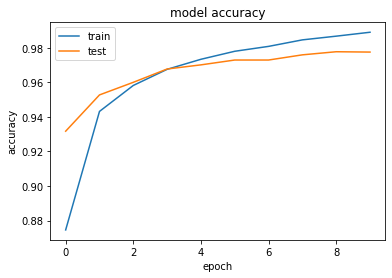

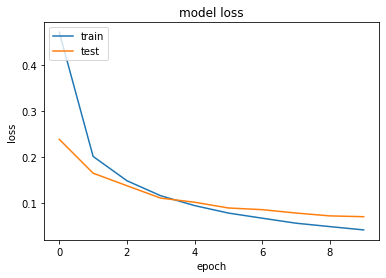

In [15]:
plot_acc(history)
plot_loss(history)